In [16]:
# Packages for EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Packages for PostgreSQL Import
import psycopg2

# Custom packages with database connection information (Not working)
    #from projectname.config import dbname, username, pswd

In [5]:
# Ideally I'll move this into the project config.py file
# Otherwise for now I have to just manually assign . . .

dbname = "freelance_db"
username = "Metaverse"
pswd = "Arcifice91"

In [33]:
# Connect to Data (from: scraping_data.ipynb)

con = None
con = psycopg2.connect(database = dbname, user = username, host='localhost', password=pswd)

# Column reference
sql_query = """SELECT * FROM freelance_db LIMIT 1;"""
col_ref = pd.read_sql_query(sql_query,con)
print(col_ref.columns)

Index(['index', 'profile_url', 'city', 'state', 'country', 'hourly_rate',
       'skills_list', 'user_description'],
      dtype='object')


In [28]:
# Querying Data - Unique obs on URL and hourly_rate

sql_query = """SELECT DISTINCT profile_url, city, hourly_rate FROM freelance_db;"""
freelance_df = pd.read_sql_query(sql_query,con)

print(freelance_df.shape)
freelance_df.head()

(841, 3)


,profile_url,city,hourly_rate
0,https://www.guru.com/freelancers/eric-p,La Puente,15
1,https://www.guru.com/freelancers/win-at-life,Los Angeles,15
2,https://www.guru.com/freelancers/bonnie-long,El Monte,9
3,https://www.guru.com/freelancers/kerryn-welle,Los Angeles,45
4,https://www.guru.com/freelancers/jblueprintscom,Anaheim,30


In [29]:
# Basic descriptives: Outcome - hourly_rate

freelance_df['hourly_rate'].mean()

43.755053507728896

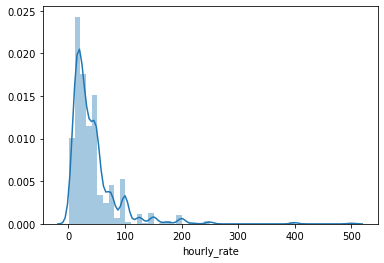

In [30]:
# Distribution

sns.distplot(freelance_df['hourly_rate'])

In [ ]:
# Can do much much much more from here:
    # 1. Different cities
        # - rate distribution by city?
        # - Number of unique obs by city?
        # - Create a map?
    # 2. Inspect skills
        # - Number of different skills?
        # - Which skills are the most common? How does rate vary within those?
        # - Group skills (???) and calculate hourly rate 
        #   distribution by those groupings
    # 3. Inspect description
        # - Text analysis of some kind.
        # - Also will need to go back and scrape info from the user pages.
        #   Could also try Selenium but may be faster to just scrape on static page.
        #   Nvm. Will have to use Selenium.